# Binary Classification of Insurance Cross-Selling

__Version 1__: only EDA

In this notebook, I aim to demonstrate a comprehensive approach to binary classification using a dataset from an insurance cross-selling scenario. The dataset consists of various features related to customer demographics, vehicle information, and previous insurance history. The target variable, `Response`, indicates whether a customer is interested in purchasing a vehicle insurance policy (1) or not (0).

By the end of this notebook, I aim to have a robust and interpretable model that can effectively predict customer interest in purchasing vehicle insurance, providing valuable insights for targeted marketing and decision-making processes.

### Approach

1. [**Data Loading and Exploratory Data Analysis (EDA):**](#1.-Data-Loading-and-Exploratory-Data-Analysis)
   - Load the dataset and perform an initial inspection to understand its structure, types of features, and any potential data quality issues.
   - Visualize the distribution of features and analyze relationships between them.
   - Understand the distribution of the target variable and explore feature interactions.

2. [**Data Preprocessing and Feature Engineering:**](#Data-Preprocessing-and-Feature-Engineering)
   - Handle any missing values, if present, and ensure data is clean and ready for analysis.
   - Perform feature engineering to create new meaningful features and transform existing ones to improve model performance.

3. [**Handling Imbalanced Data:**](#Handling-Imbalanced-Data)
   - Address the class imbalance in the target variable `Response` using techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to create a balanced dataset.

4. [**Model Building and Evaluation:**](#Model-Building-and-Evaluation)
   - Train various machine learning models on the processed dataset and evaluate their performance using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
   - Perform hyperparameter tuning to optimize model performance.

5. [**Visualization and Interpretation:**](#Visualization-and-Interpretation)
   - Use visualizations to interpret model results and understand feature importance.
   - Provide insights and recommendations based on the analysis and model outcomes.

6. [**Conclusion and Future Work:**](#Conclusion-and-Future-Work)
   - Summarize key findings and conclusions drawn from the analysis.
   - Discuss potential improvements and future work to further enhance the predictive model.

By following this structured approach, we will systematically address each step of the analysis and model-building process, ensuring a thorough and insightful exploration of the data and its predictive capabilities.


## 0. Notebook Preparation

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.api.types import CategoricalDtype

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from enum import Enum

from IPython.display import display

### Set Plot Style and Color

In [2]:
sns.set_style("whitegrid")
pd.set_option('styler.format.thousands', ",")


class PlotColor(Enum):
    TEXT = "#3F5661"
    BG = "#E9EDF0"
    GRID = "#B7C6CF"
    AX = "#758D99"
    RED = "#DB444B"
    BLUE = "#006BA2"
    CYAN = "#3EBCD2"
    GREEN = "#37BB84"
    YELLOW = "#EBB434"
    OLIVE = "#B4BA39"
    PURPLE = "#9A607F"
    GREY = "#758D99"
    RED1 = "#E64E53"
    BLUE1 = "#3D89C3"
    CYAN1 = "#0092A7"
    GREEN1 = "#32C67A"
    YELLOW1 = "#AA7C00"
    OLIVE1 = "#818A00"
    PURPLE1 = "#AD7291"
    GREY1 = "#6F8793"
    RED2 = "#FF8785"
    BLUE2 = "#7BBFFC"
    CYAN2 = "#4EC8DE"
    GREEN2 = "#74D9A5"
    YELLOW2 = "#E7B030"
    OLIVE2 = "#BAC03F"
    PURPLE2 = "#E6A6C7"
    GREY2 = "#A4BDC9"

    @property
    def rgb(self):
        return matplotlib.colors.hex2color(self.value)

sns.set_palette([
    eval(f"PlotColor.{col_name}.rgb") for col_name in (
        "BLUE", "RED", "CYAN", "GREEN", "YELLOW", "OLIVE", "PURPLE", "GREY"
    )
])    

plt.rcParams['axes.edgecolor'] = PlotColor.AX.rgb
plt.rcParams['axes.facecolor'] = PlotColor.BG.rgb
plt.rcParams['patch.edgecolor'] = PlotColor.BG.rgb
plt.rcParams['axes.labelcolor'] = PlotColor.TEXT.rgb
plt.rcParams['xtick.color'] = PlotColor.AX.rgb
plt.rcParams['ytick.color'] = PlotColor.AX.rgb
plt.rcParams['figure.facecolor'] = PlotColor.BG.rgb
plt.rcParams['grid.color'] = PlotColor.GRID.rgb
plt.rcParams['text.color'] = PlotColor.TEXT.rgb
plt.rcParams['font.family'] = "DejaVu Sans"
plt.rcParams['axes.titlelocation'] = 'left'

## 1. Data Loading and Exploratory Data Analysis

### 1.1 Data Loading and Initial Inspection

The dataset contains various features related to customer demographics, vehicle information, and insurance history. Below is a brief description of each column in the dataset:

| Column                | Description                                                   |
|-----------------------|---------------------------------------------------------------|
| **ID**                | Unique identifier for the customer                           |
| **Age**               | Age of the customer                                          |
| **Gender**            | Gender of the customer                                       |
| **Driving_License**   | Indicator for driving license possession (0: not present, 1: present) |
| **Region_Code**       | Unique code for the customer's region                        |
| **Previously_Insured**| Indicator for previous vehicle insurance (0: not insured, 1: insured) |
| **Vehicle_Age**       | Age of the vehicle                                           |
| **Vehicle_Damage**    | Indicator for previous vehicle damage (0: no damage, 1: damaged) |
| **Annual_Premium**    | Amount to be paid as annual premium                          |
| **Policy_Sales_Channel**| Anonymized code for the sales channel assigned to the customer |
| **Vintage**           | Number of days the customer has been associated with the company |
| **Response**          | Indicator of customer interest (0: not interested, 1: interested) |

Let's load the dataset and perform an initial inspection.

In [3]:
# Load the training dataset
train_df = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv', index_col="id")

# Display the first few rows of the dataset
display(train_df.head())

# Check the data types and non-null counts
print("\nData Types and Non-Null Counts:")
display(train_df.info())

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0



Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ GB


None

### 1.2 Exploratory Data Analysis

#### Checking for Missing Values

In [4]:
# Check for any missing values
print("Missing values by features:")
train_df.isnull().sum()

Missing values by features:


Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### Summary Statistics

In [5]:
# Summary statistics
display(train_df.describe().T.astype({"count": int}))

stats = train_df.describe(include=["object", "bool"])
stats.loc["values"] = train_df[stats.columns].apply(lambda x: x.unique() if x.nunique() <= 10 else "More than 10 unique values")
stats.T.style

,count,mean,std,min,25%,50%,75%,max
Age,11504798,38.383563,14.993459,20.0,24.0,36.0,49.0,85.0
Driving_License,11504798,0.998022,0.044431,0.0,1.0,1.0,1.0,1.0
Region_Code,11504798,26.418690,12.991590,0.0,15.0,28.0,35.0,52.0
Previously_Insured,11504798,0.462997,0.498629,0.0,0.0,0.0,1.0,1.0
Annual_Premium,11504798,30461.370411,16454.745205,2630.0,25277.0,31824.0,39451.0,540165.0
Policy_Sales_Channel,11504798,112.425442,54.035708,1.0,29.0,151.0,152.0,163.0
Vintage,11504798,163.897744,79.979531,10.0,99.0,166.0,232.0,299.0
Response,11504798,0.122997,0.328434,0.0,0.0,0.0,0.0,1.0


,count,unique,top,freq,values
Gender,"11,504,798",2,Male,"6,228,134",['Male' 'Female']
Vehicle_Age,"11,504,798",3,1-2 Year,"5,982,678",['1-2 Year' '> 2 Years' '< 1 Year']
Vehicle_Damage,"11,504,798",2,Yes,"5,783,229",['Yes' 'No']


#### Data Preprocessing

In [6]:
train_df["Vehicle_Previous_Damage_Status"] = train_df["Vehicle_Damage"] == "Yes"
train_df["Is_Gender_Male"] = train_df["Gender"] == "Male"
train_df.drop(columns=["Gender", "Vehicle_Damage"], inplace=True)
train_df["Vehicle_Age"] = train_df["Vehicle_Age"].astype(
    CategoricalDtype(categories=["< 1 Year", "1-2 Year", "> 2 Years"], ordered=True)
)
train_df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Previous_Damage_Status,Is_Gender_Male
id,,,,,,,,,,,
0,21,1,35.0,0,1-2 Year,65101.0,124.0,187,0,True,True
1,43,1,28.0,0,> 2 Years,58911.0,26.0,288,1,True,True
2,25,1,14.0,1,< 1 Year,38043.0,152.0,254,0,False,False
3,35,1,1.0,0,1-2 Year,2630.0,156.0,76,0,True,False
4,36,1,15.0,1,1-2 Year,31951.0,152.0,294,0,False,False


Conclusions from the initial inspection:
- There are no missing values in the dataset.
- The dataset consists of 11 columns with various data types:
    - Numerical: `Age`, `Region_Code`, `Annual_Premium`, `Policy_Sales_Channel`, and `Vintage`
    - Categorical:
        - Binary: `Driving_License`, `Previously_Insured`, `Is_Gender_Male`, `Vehicle_Previous_Damage_Status`, and `Response`
        - More than 2 values: `Vehicle_Age`.
- The target variable (`Response`) is imbalanced with only 12.3% of positive responses.

#### Feature Distributions

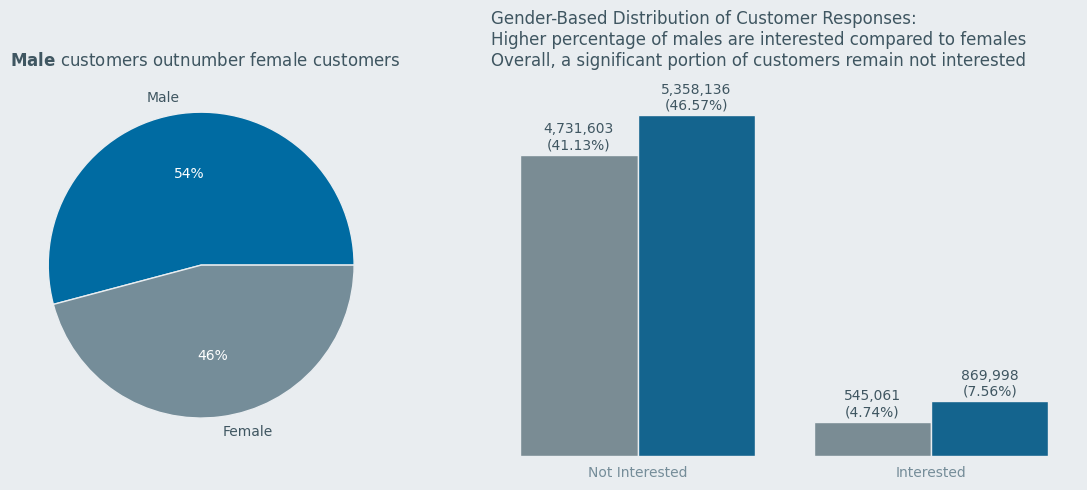

In [7]:
# Calculate gender distribution for pie chart
stats_gender = train_df["Is_Gender_Male"].value_counts()
labels_gender = np.array(["Female", "Male"])
colors_gender = np.array([PlotColor.GREY.rgb, PlotColor.BLUE.rgb])

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart for gender distribution
_, _, autotexts = ax[0].pie(
    stats_gender,
    labels=labels_gender[stats_gender.index.astype(int)],
    autopct='%.0f%%',
    colors=colors_gender[stats_gender.index.astype(int)]
)

# Set label color to white
for autotext in autotexts:
    autotext.set_color('white')
ax[0].set_title(r"$\mathbf{Male}$ customers outnumber female customers")

# Calculate response distribution by gender
counts = train_df[["Is_Gender_Male", "Response"]].value_counts().reset_index(name='Count')
counts['Pct'] = (counts['Count'] / counts['Count'].sum() * 100).round(2)

# Bar plot for response distribution by gender
sns.barplot(
    data=counts,
    x='Response',
    hue='Is_Gender_Male',
    y='Count',
    palette={0: PlotColor.GREY.rgb, 1: PlotColor.BLUE.rgb},
    ax=ax[1]
)

# Add labels on top of the bars with count and percentage
for p in ax[1].patches:
    height = p.get_height()
    label = f"{int(height):,}\n({counts['Pct'][counts['Count'] == height].values[0]}%)"
    ax[1].annotate(
        label,
        (p.get_x() + p.get_width() / 2., height+max(counts['Count'])*.03),
        ha='center', va='center',
        xytext=(0, 5),  # 5 points vertical offset
        textcoords='offset points'
    )

# Customize the bar plot
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(
    'Gender-Based Distribution of Customer Responses:\n'
    'Higher percentage of males are interested compared to females\n'
    'Overall, a significant portion of customers remain not interested'
)
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Not Interested', 'Interested'])
ax[1].set_ylim((0, 6e6))

# Remove y-axis ticks and borders for the second plot
ax[1].get_yaxis().set_visible(False)
for spine in ax[1].spines.values():
    spine.set_visible(False)
ax[1].get_legend().remove()
plt.grid(axis='y', which='both')  # Keep gridlines only on y-axis for the bar plot
plt.tight_layout();

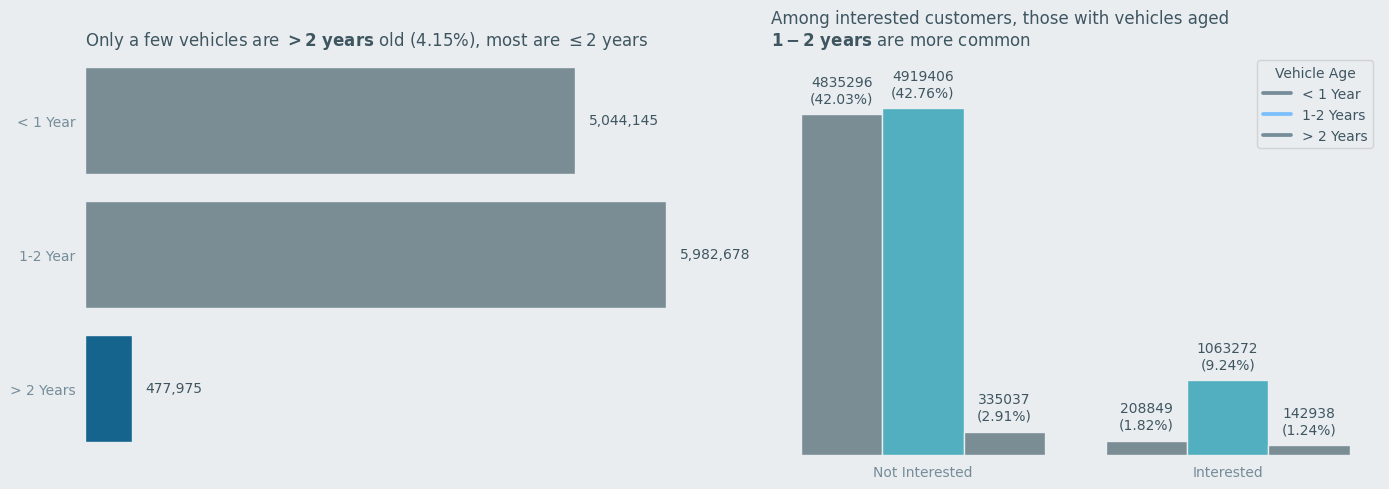

In [8]:
# Calculate vehicle age distribution
stats = train_df["Vehicle_Age"].value_counts()
stats_pct = (stats / stats.sum() * 100).round(2)

# Define labels and colors based on unique values in 'Vehicle_Age'
labels = stats.index.sort_values()
colors = [PlotColor.GREY.rgb, PlotColor.GREY.rgb, PlotColor.BLUE.rgb]

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # Adjust height here

# Bar plot for vehicle age distribution
sns.barplot(
    x=stats.values,
    y=stats.index,
    palette=colors,
    ax=ax[0]
)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title(
    f"Only a few vehicles are $\mathbf{{> 2\ years}}$ old ({stats_pct.iloc[2]}%), most are $\leq 2$ years"
)
ax[0].grid(False)
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].get_xaxis().set_visible(False)
ax[0].bar_label(ax[0].containers[0], fmt='{:,.0f}', padding=10)

# Calculate response distribution by vehicle age
counts = train_df[["Vehicle_Age", "Response"]].value_counts().reset_index(name='Count')
counts["Vehicle_Age_Enc"] = counts["Vehicle_Age"].map({'< 1 Year': 0, '1-2 Year': 1,'> 2 Years': 2})
counts['Pct'] = (counts['Count'] / counts['Count'].sum() * 100).round(2)

# Bar plot for response distribution by vehicle age
sns.barplot(
    data=counts,
    x='Response',
    hue='Vehicle_Age_Enc',
    y='Count',
    palette={0: PlotColor.GREY.rgb, 1: PlotColor.CYAN.rgb, 2: PlotColor.GREY.rgb},
    ax=ax[1]
)

# Add labels on top of the bars with count and percentage
for p in ax[1].patches:
    height = p.get_height()
    label = f"{int(height)}\n({counts['Pct'][counts['Count'] == height].values[0]}%)"
    ax[1].annotate(
        label,
        (p.get_x() + p.get_width() / 2., height+max(counts['Count'])*.05),
        ha='center', va='center',
        xytext=(0, 5),  # 5 points vertical offset
        textcoords='offset points'
    )

# Customize the bar plot
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(
    'Among interested customers, those with vehicles aged\n$\mathbf{1-2\ years}$ are more common'
)
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Not Interested', 'Interested'])
leg = ax[1].legend(title='Vehicle Age', labels=['< 1 Year', '1-2 Years', '> 2 Years'])
leg.legend_handles[0].set_color(PlotColor.GREY.rgb)
leg.legend_handles[1].set_color(PlotColor.BLUE2.rgb)
leg.legend_handles[2].set_color(PlotColor.GREY.rgb)

# Remove y-axis ticks and borders for the second plot
ax[1].get_yaxis().set_visible(False)
for spine in ax[1].spines.values():
    spine.set_visible(False)
    
# Adjust y-axis limit to shorten bars
ax[1].set_ylim(0, 5.7e6)  # Adjust this value based on your data
ax[1].grid(False)
# Adjust layout to fit the plot
plt.tight_layout()

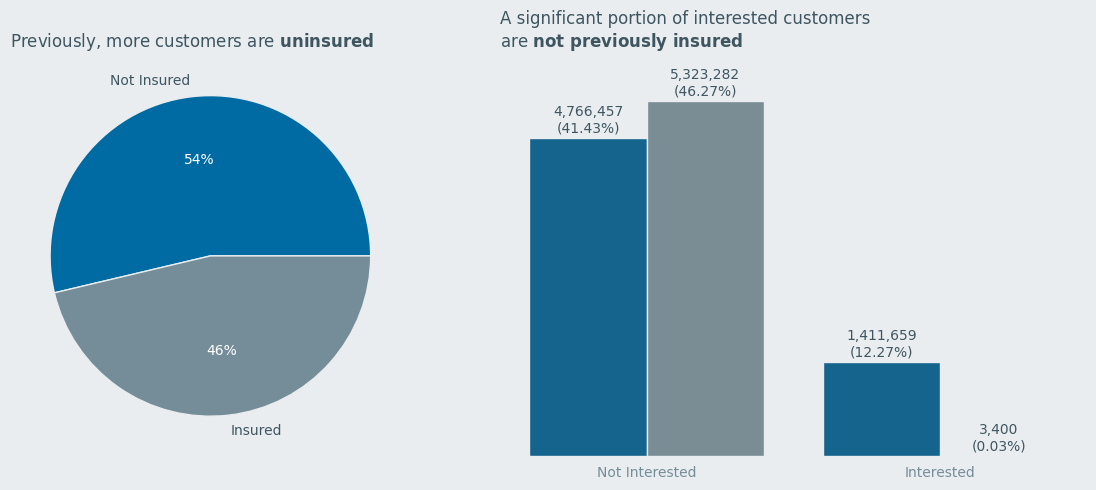

In [9]:
# Calculate insurance distribution for pie chart
stats_insured = train_df["Previously_Insured"].value_counts()
labels_insured = np.array(["Not Insured", "Insured"])
colors_insured = np.array([PlotColor.BLUE.rgb, PlotColor.GREY.rgb])

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart for insurance distribution
_, _, autotexts = ax[0].pie(
    stats_insured,
    labels=labels_insured[stats_insured.index.astype(int)],
    autopct='%.0f%%',
    colors=colors_insured[stats_insured.index.astype(int)]
)
# Set label color to white
for autotext in autotexts:
    autotext.set_color('white')

ax[0].set_title("Previously, more customers are $\mathbf{uninsured}$");

# Calculate response distribution by insurance status
counts = train_df[["Previously_Insured", "Response"]].value_counts().reset_index(name='Count')
counts['Pct'] = (counts['Count'] / counts['Count'].sum() * 100).round(2)

# Bar plot for response distribution by insurance status
sns.barplot(
    data=counts,
    x='Response',
    hue='Previously_Insured',
    y='Count',
    palette={0: PlotColor.BLUE.rgb, 1: PlotColor.GREY.rgb},
    ax=ax[1]
)

# Add labels on top of the bars with count and percentage
for p in ax[1].patches:
    height = p.get_height()
    label = f"{int(height):,}\n({counts['Pct'][counts['Count'] == height].values[0]}%)"
    ax[1].annotate(
        label,
        (p.get_x() + p.get_width() / 2., height+max(counts['Count'])*.03),
        ha='center', va='center',
        xytext=(0, 5),  # 5 points vertical offset
        textcoords='offset points'
    )

# Customize the bar plot
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('A significant portion of interested customers\nare $\mathbf{not\ previously\ insured}$')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Not Interested', 'Interested'])
ax[1].set_ylim((0, 6e6))

# Remove y-axis ticks and borders for the second plot
ax[1].get_yaxis().set_visible(False)
for spine in ax[1].spines.values():
    spine.set_visible(False)

ax[1].get_legend().remove()
plt.grid(axis='y', which='both')  # Keep gridlines only on y-axis for the bar plot
plt.tight_layout();

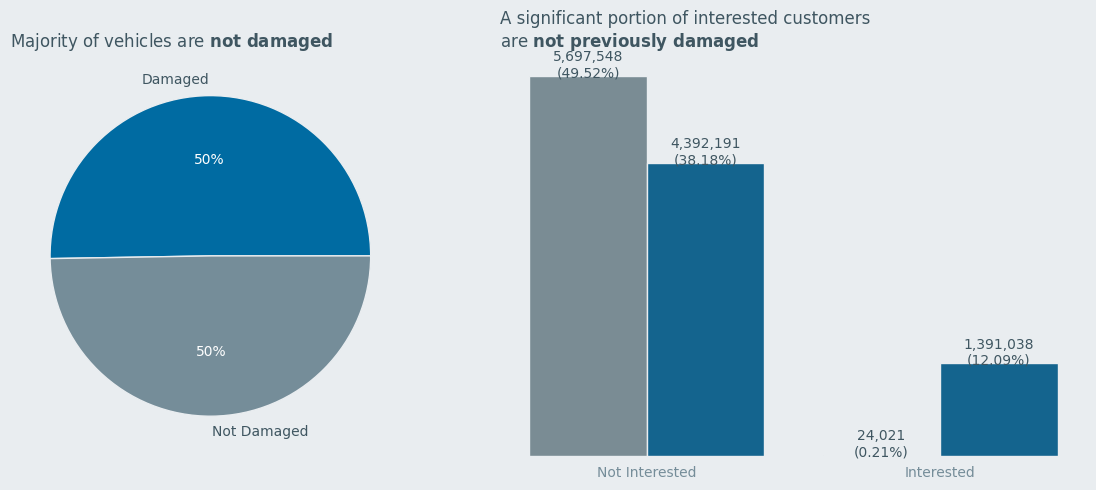

In [10]:
# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Data for Vehicle Damage Status
stats_insured = train_df["Vehicle_Previous_Damage_Status"].value_counts()
labels_insured = np.array(["Not Damaged", "Damaged"])
colors_insured = np.array((PlotColor.GREY.rgb, PlotColor.BLUE.rgb))

# Pie chart for vehicle damage status distribution
_, _, autotexts = ax[0].pie(
    stats_insured,
    labels=labels_insured[stats_insured.index.astype(int)],
    autopct='%.0f%%',
    colors=colors_insured[stats_insured.index.astype(int)]
)

# Set label color to white
for autotext in autotexts:
    autotext.set_color('white')

ax[0].set_title("Majority of vehicles are $\mathbf{not\ damaged}$")

# Calculate response distribution by vehicle damage status
counts = train_df.groupby(['Vehicle_Previous_Damage_Status', 'Response']).size().reset_index(name='Count')
counts['Pct'] = (counts['Count'] / counts['Count'].sum() * 100).round(2)

# Bar plot for response distribution by vehicle damage status
sns.barplot(
    data=counts,
    x='Response',
    hue='Vehicle_Previous_Damage_Status',
    y='Count',
    palette={0: PlotColor.GREY.rgb, 1: PlotColor.BLUE.rgb},
    ax=ax[1]
)

# Add labels on top of the bars with count and percentage
for p in ax[1].patches:
    height = p.get_height()
    label = f"{int(height):,}\n({counts['Pct'][counts['Count'] == height].values[0]}%)"
    ax[1].annotate(
        label,
        (p.get_x() + p.get_width() / 2., height + max(counts['Count']) * .01),
        ha='center', va='center',
        xytext=(0, 5),  # 5 points vertical offset
        textcoords='offset points'
    )

# Customize the bar plot
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('A significant portion of interested customers\nare $\mathbf{not\ previously\ damaged}$')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Not Interested', 'Interested'])
ax[1].set_ylim((0, 6e6))

# Remove y-axis ticks and borders for the second plot
ax[1].get_yaxis().set_visible(False)
for spine in ax[1].spines.values():
    spine.set_visible(False)

# Adjust layout and remove legend
ax[1].get_legend().remove()
plt.grid(axis='y', which='both')  # Keep gridlines only on y-axis for the bar plot
plt.tight_layout();

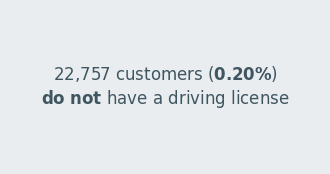

In [11]:
stats = train_df["Driving_License"].value_counts()
text = f"{stats.loc[0]:,} customers ($\mathbf{{{stats.loc[0]/stats.sum()*100:.2f}\%}}$)\n$\mathbf{{do\ not}}$ have a driving license"

fig, ax = plt.subplots(figsize=(4, 2))
ax.axis('off')
ax.text(0.5, 0.5, text, fontsize=12, ha='center', va='center');

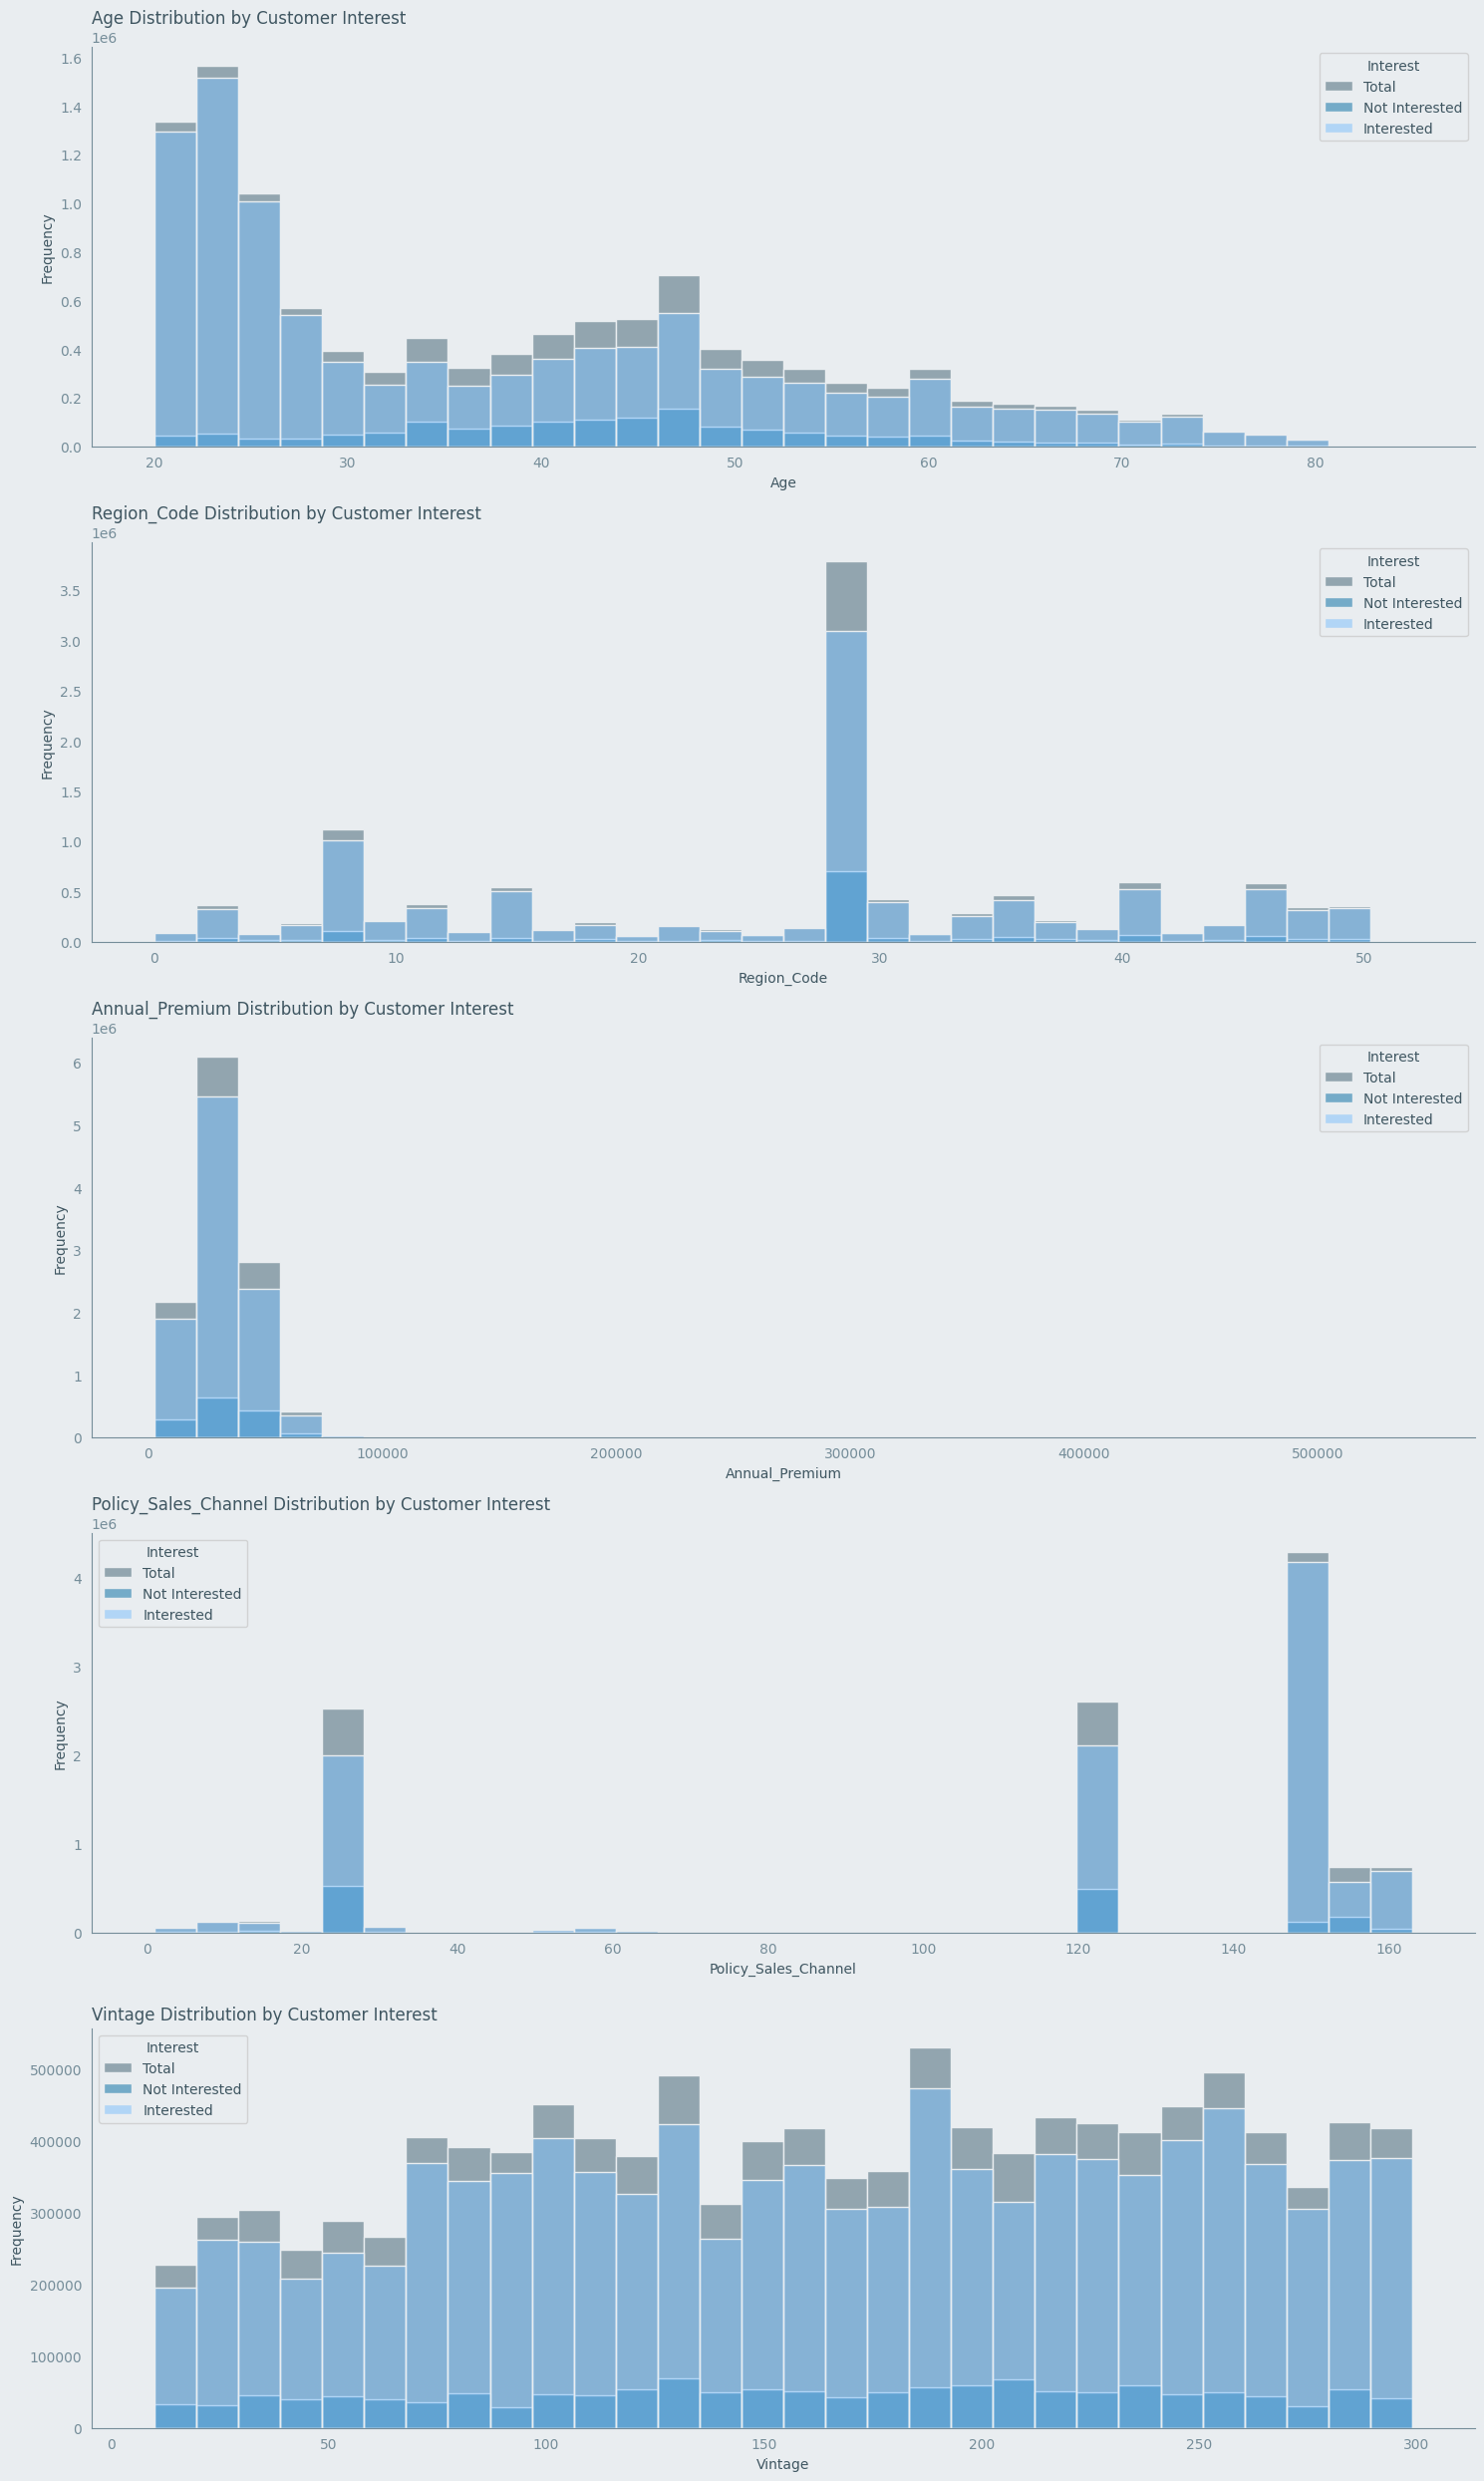

In [12]:
fig, ax = plt.subplots(5, 1, figsize=(15, 25))

# List of columns to plot
columns = ["Age", "Region_Code", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]

# Plot histograms for each column
for i, column_name in enumerate(columns):
    sns.histplot(data=train_df, x=column_name, bins=30, color=PlotColor.GREY.rgb, ax=ax[i], kde=False)
    sns.histplot(data=train_df, x=column_name, hue="Response", bins=30, palette=[PlotColor.BLUE2.rgb, PlotColor.BLUE.rgb], ax=ax[i], kde=False)
    ax[i].set_title(f'{column_name} Distribution by Customer Interest')
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Frequency')
    ax[i].grid(False)
    ax[i].legend(title='Interest', labels=['Total', 'Not Interested', 'Interested'])
    
    # Remove top and right borders
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout();

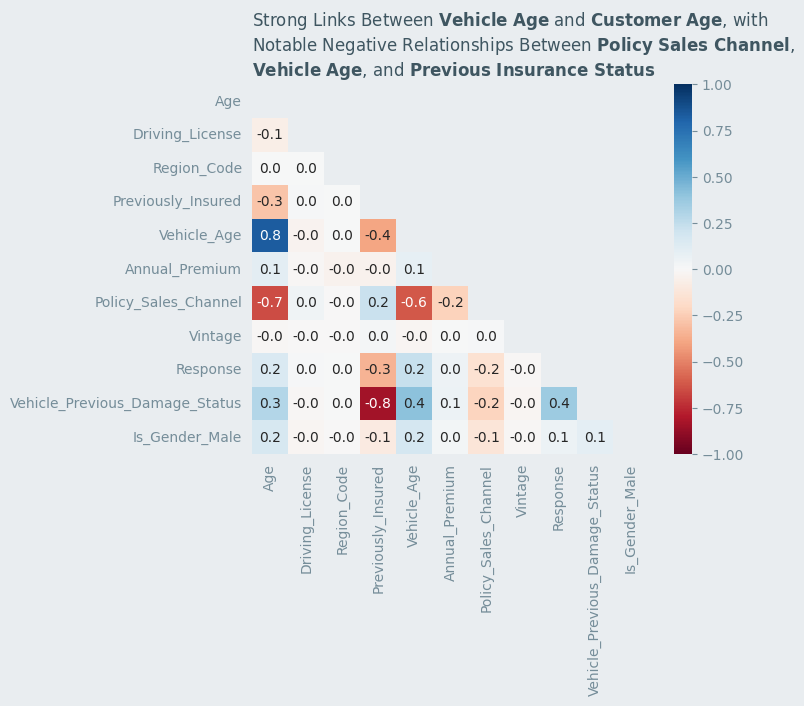

In [13]:
tmp_df = train_df.copy()
tmp_df['Vehicle_Age'] = tmp_df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1,'> 2 Years': 2})
stats = tmp_df.corr(method='spearman')
ax = sns.heatmap(stats, mask=np.triu(np.ones_like(stats, dtype=bool)), annot=True, cmap='RdBu', fmt='.1f', vmin=-1, vmax=1)
plt.grid(False)
ax.set_title(
    "Strong Links Between $\mathbf{Vehicle\ Age}$ and $\mathbf{Customer\ Age}$, with\n"
    "Notable Negative Relationships Between $\mathbf{Policy\ Sales\ Channel}$,\n"
    "$\mathbf{Vehicle\ Age}$, and $\mathbf{Previous\ Insurance\ Status}$"
);

**Key Correlations:**

- **Vehicle Age** is strongly correlated with **Customer Age** (0.83).
- **Policy Sales Channel** shows moderate to strong negative correlations with:
  - **Vehicle Age** (-0.62)
  - **Customer Age** (-0.66)
- **Vehicle Damage** is strongly negatively correlated with **Previously Insured** status (-0.84).

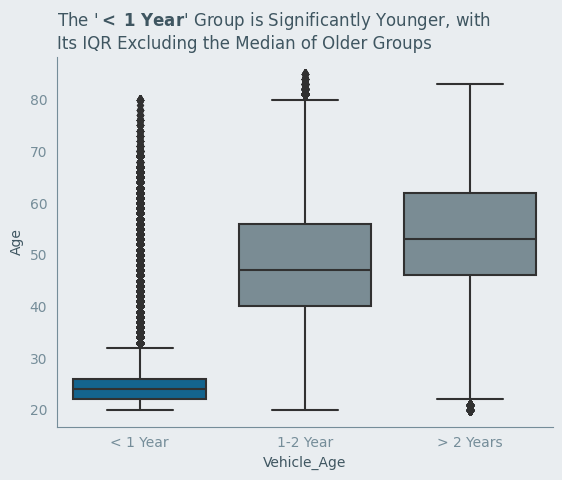

In [14]:
ax = sns.boxplot(y=train_df["Age"], x=train_df["Vehicle_Age"], palette=[PlotColor.BLUE.rgb, PlotColor.GREY.rgb, PlotColor.GREY.rgb])
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("The '$\mathbf{<\ 1\ Year}$' Group is Significantly Younger, with\nIts IQR Excluding the Median of Older Groups");

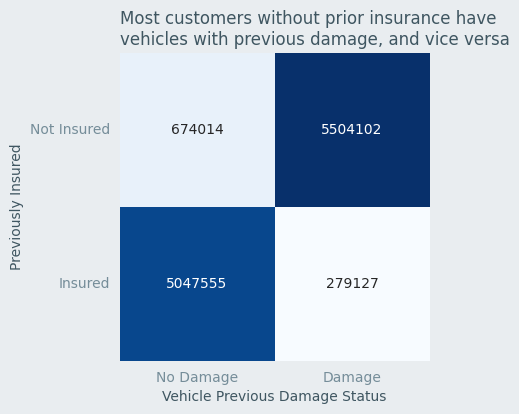

In [15]:
# Create a cross-tabulation of the binary values
cross_tab = pd.crosstab(train_df["Previously_Insured"], train_df["Vehicle_Previous_Damage_Status"])

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Customize the plot
ax.set_xlabel('Vehicle Previous Damage Status')
ax.set_ylabel('Previously Insured')
ax.set_title('Most customers without prior insurance have\nvehicles with previous damage, and vice versa')
plt.xticks(ticks=[0.5, 1.5], labels=['No Damage', 'Damage'], rotation=0)
plt.yticks(ticks=[0.5, 1.5], labels=['Not Insured', 'Insured'], rotation=0);

Among those who are not previously insured, a significant majority (over 80%) have vehicles with previous damage. In contrast, among those who are previously insured, the majority have vehicles without previous damage.

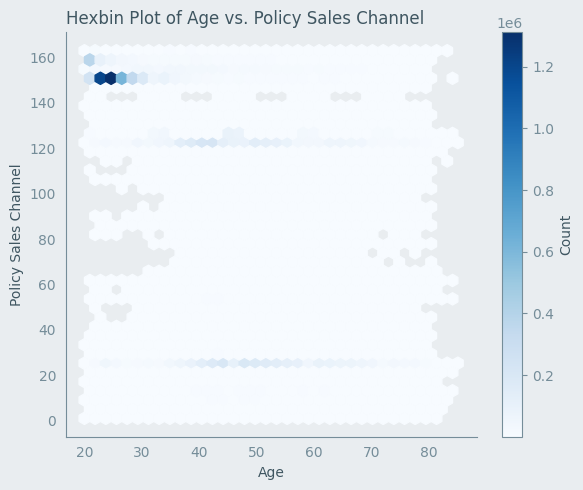

In [16]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.hexbin(train_df["Age"], train_df["Policy_Sales_Channel"], gridsize=35, cmap='Blues', mincnt=1)

plt.colorbar(label='Count')
plt.xlabel('Age')
plt.ylabel('Policy Sales Channel')
plt.title('Hexbin Plot of Age vs. Policy Sales Channel')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)
plt.tight_layout()

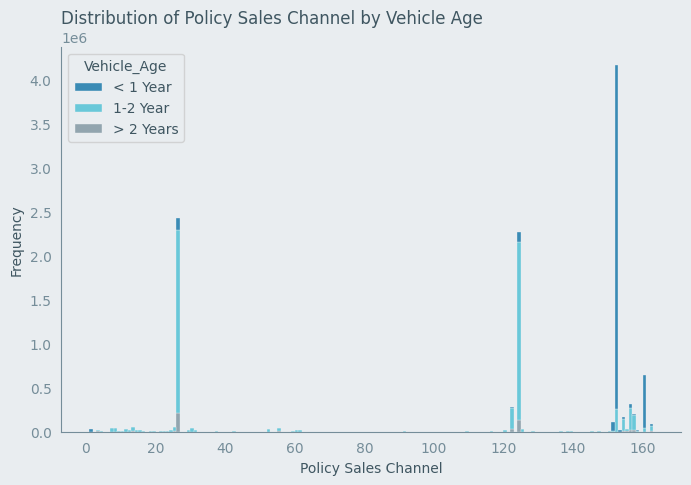

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plot histograms for each Vehicle_Age category
sns.histplot(data=train_df, x="Policy_Sales_Channel", hue="Vehicle_Age", palette=[PlotColor.BLUE.rgb, PlotColor.CYAN.rgb, PlotColor.GREY.rgb], multiple="stack", binwidth=1, ax=ax)

# Customize the plot
ax.set_title("Distribution of Policy Sales Channel by Vehicle Age")
ax.set_xlabel("Policy Sales Channel")
ax.set_ylabel("Frequency")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)